# Computational Physics Tutorial 2 Number 2

Here we import all the packages we're goin to use throughout

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as int
from scipy.integrate import quad

We're given the Woods-Saxon density distribution:
$$\rho(r) = \frac{\rho_0}{1+e^{(r-R)/a}} $$ where $\rho(r)$ is the nucleon density at a distance $r$ away from the center of the nucleus, $\rho_0$ is the nucleon density at the center of the nucleus, $R$ is its radius and $a$ is the skin depth. Each nucleon is distributed with a probability:
$$P(r,\theta, \phi) = \rho(r)dV = \rho(r)r^2drd\theta d\phi$$

To find the normalization constant $A\rho_0$, with $A=208$ nucleons, we integrate the probability distribution over all space and equate it to 1. This simplifies to:
$$\rho_0 = \frac{A}{\int^{\infty}_{0} 4\pi \rho(r)r^2}$$.
We can't solve that integral anaylytically, so we integrate it numerically using a python's built-in package $\textit{quad}$.

To find the expected number of nucleons $N(r)$ at distance $r$ from the center of the nucleus, we note that we have a nucleon density in 2 dimensions i.e $\rho(r) = \frac{N(r)}{Area}$ and thus we can re-arrage this to get: $$N(r) = \rho(r)4\pi r^2$$. A large sample of $r$ values was then drawn and used as arguments to the above equation and the result was plotted.

/var/folders/r5/7cqmwmyn3293fd069wkmw9zw0000gq/T/ipykernel_14021/3749348920.py:19: RuntimeWarning: overflow encountered in exp
  return (4 *np.pi* r**2) / (1 + np.exp((r - R)/ a))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The density at the center is:  0.1317258964995731


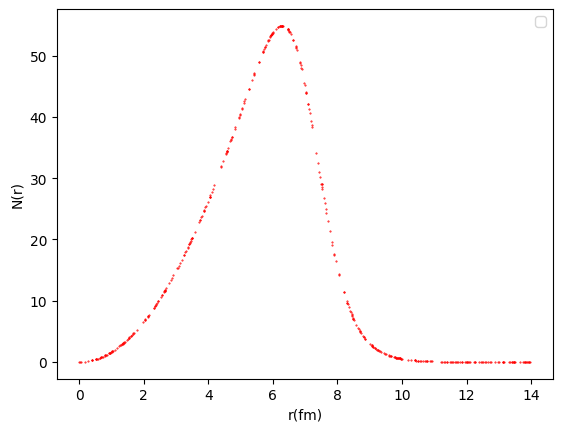

In [2]:
A = 208             # total number of nucleons in nucleus
R = (A**(1/3))*1.2  # radius of nucleus in fm
a = 0.5             # parameter of Fermi distribution in fm
Na = 6.022e23
N = 400
sigma = 7.2         # fm^2

#################################################################################################
#2a) Getting the expected number of nucleons some distance r and plotting the result
#################################################################################################

# generate samples from Fermi distribution
# r = np.random.uniform(0,14, 10000)          # sample r from 0 to 14 fm
r = np.random.rand(N) * 14
# N = 208             

# calculate normalization constant Norm_Constant
def den_f(r,R,a):
    return (4 *np.pi* r**2) / (1 + np.exp((r - R)/ a))
rho_0 = A / (int.quad(den_f, 0, np.inf, args=(R,a))[0])
print("The density at the center is: ", rho_0)

N_r = (rho_0 *4*np.pi*r**2 / (1 + np.exp((r - R)/ a)))

plt.scatter(r,N_r, marker = '.', s = 0.8, color='r')
plt.xlabel('r(fm)')
plt.ylabel('N(r)')
plt.legend()
plt.show()


To distribute the nucleons homogeneously over the sphere with radius $r$ to determine $x$,$y$ and $z$, we draw a large random sample or $r$ values. We then parse these values into the Woods-Saxon density distribution to calculate the $r$ values distributed according to the required distribution. We do this using:
$$r_{samples} = R \ln{\left(\frac{\rho_0}{\rho(r)}\right)} + R$$

Then we trivially generate samples for both $\theta$ and $\phi$ using:
$$\theta_{samples} = \arccos{(2r-1)}$$ and $$\phi_{samples} = 2\pi r$$

The next step is to obviously write $x$,$y$ and $z$ in terms of $r_{samples}$, $\theta_{samples}$ and $\phi_{samples}$ which is:



$$x = r_{samples}\sin(\theta_{samples}) \cos(\phi_{samples})$$

$$y = r_{samples}\sin(\theta_{samples}) \sin(\phi_{samples})$$

$$z = r_{samples}\cos(\theta_{samples})$$

The results were then plotted as seen below.

[0.52378765 0.1412467  0.69595541 0.9899535  0.13116403 0.48718656
 0.44845891 0.55327425 0.58375758 0.51723565 0.89839193 0.67362311
 0.78511428 0.77660154 0.67916351 0.50123148 0.15773478 0.31345787
 0.49256249 0.14754258 0.28619192 0.50672818 0.52259195 0.61068956
 0.71161839 0.07160693 0.94342732 0.18094994 0.26851625 0.92394698
 0.50529058 0.19178522 0.38166242 0.33444793 0.77871011 0.58751669
 0.60937099 0.07977302 0.70951083 0.60488892 0.72111514 0.23491949
 0.3789016  0.81567371 0.95436984 0.21546818 0.10570404 0.03177188
 0.66312368 0.33215652 0.42531245 0.96999997 0.94282085 0.53769206
 0.33896708 0.295584   0.29724495 0.4254233  0.95533302 0.3432913
 0.51094028 0.44545984 0.78763787 0.62544669 0.35359049 0.79188645
 0.42426354 0.86730901 0.78396575 0.70755556 0.68800663 0.33704702
 0.80640584 0.53821251 0.35332424 0.49729914 0.64324163 0.83240331
 0.61743865 0.0843142  0.9580828  0.60995123 0.19996272 0.70853566
 0.98487917 0.46299545 0.68241571 0.79222486 0.43354848 0.65239

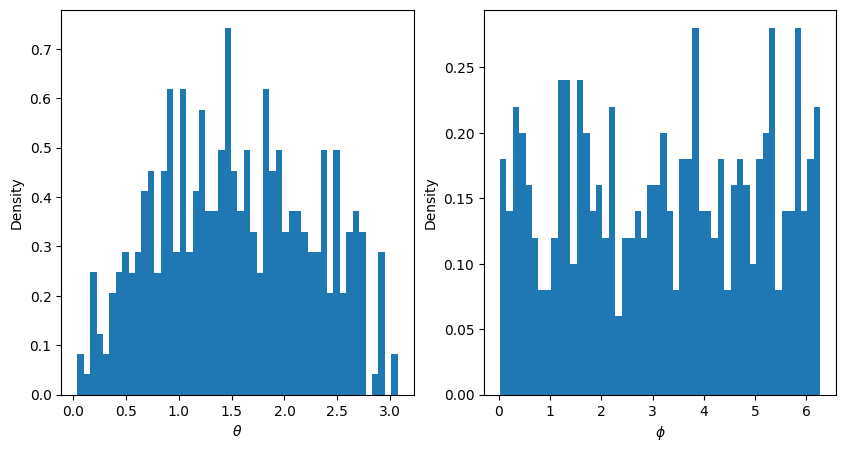

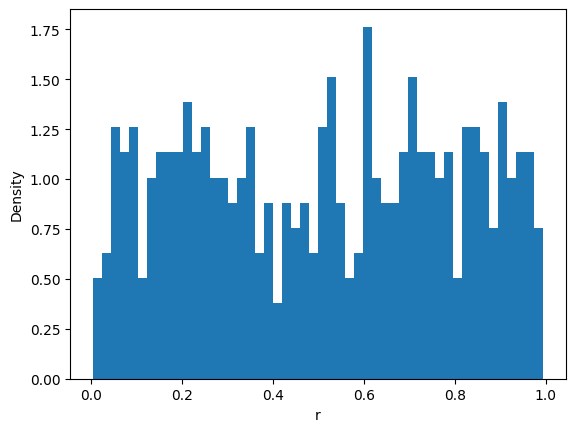

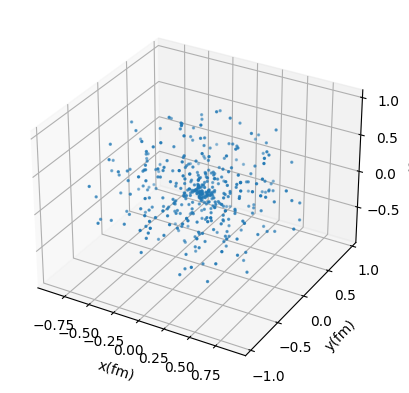

In [3]:
#################################################################################################
#2b) Checking the isotropy and radial distribution of the nucleons 
#################################################################################################

# generate samples from Fermi distribution
r1 = np.random.rand(N)      # sample r in fm
print(r1)

def density(r):
    rho_r = rho_0 / (1 + np.exp((r - R)/ a))
    return rho_r

# Generate random values of r using Fermi distribution
r_samples = a *np.log((rho_0 / density(r1)) - 1) + R

# Generate random values of theta and phi
theta_samples = np.arccos(np.random.uniform(-1,1,N))
phi_samples = np.random.uniform(0, 2*np.pi, N)

# Convert to Cartesian coordinates
x_samples = r_samples * np.sin(theta_samples) * np.cos(phi_samples)
y_samples = r_samples * np.sin(theta_samples) * np.sin(phi_samples)
z_samples = r_samples * np.cos(theta_samples)

# Check isotropy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(theta_samples, bins=50, density=True)
ax1.set_xlabel(r'$\theta$')
ax1.set_ylabel('Density')
ax2.hist(phi_samples, bins=50, density=True)
ax2.set_xlabel(r'$\phi$')
ax2.set_ylabel('Density')
plt.show()

# Check radial distribution
plt.hist(r_samples, bins=50, density=True)
plt.xlabel('r')
plt.ylabel('Density')
plt.show()

# Plot 3D distribution
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_samples, y_samples, z_samples, s=2)
ax.set_xlabel('x(fm)')
ax.set_ylabel('y(fm)')
ax.set_zlabel('z(fm)')
plt.show()

We can clearly see that there are a lot of nucleons at the shell of the sphere which is expected behaviour as seen in the plot of the expected number of nucleons (The peak we see around $r=R$).

To sample the impact paramater $b$, we need to first calculate the maximum possible impact parameter first that we can use as the upper bound. We know that maximum impact parameter is given by:
$$b_{max} = 2.5R$$ where R, as usual, is the radius of the nucleus. We then generate uniform random samples using $b_{max}$ as the upper bound. We note that the generated $b$ samples are functions of $r$, so we can write:
$$b(r)= b\left(\sqrt{{b_x}^2+{b_y}^2}\right)$$. We then generate a uniform random $\phi_{samples} = 2\pi r$.

we can then finally write :$$b_x = b(r)\cos{(\phi_{samples})}$$
$$b_y = b(r)\sin{(\phi_{samples})}$$ 

We then plotted $b_x$ vs $b_y$ to visualized the distribution of the impact parameters.

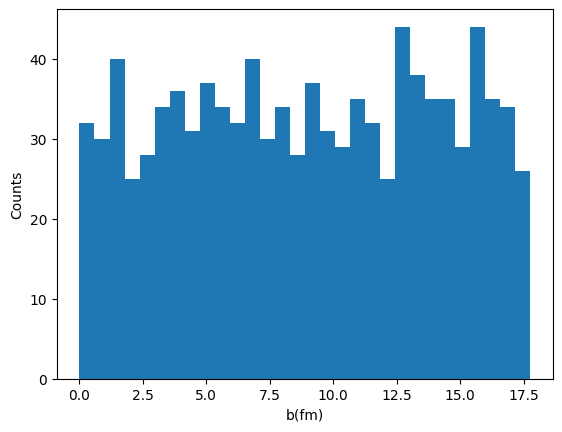

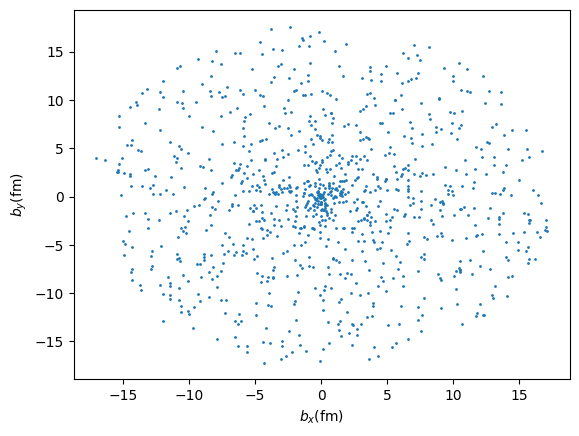

In [4]:
bmax = 2.5 * R # maximum impact parameter in fm
N = 1000 # total number of collisions

# generate samples of b and phi
b_samples = np.random.rand(N) * bmax
phi_samples = np.random.rand(N) * 2 * np.pi

# convert to cartesian coordinates
bx_samples = b_samples * np.cos(phi_samples)
by_samples = b_samples * np.sin(phi_samples)

# plot histogram of impact parameter magnitudes
fig, ax = plt.subplots()
ax.hist(b_samples, bins=30)
ax.set_xlabel('b(fm)')
ax.set_ylabel('Counts')
plt.show()

# plot scatter plot of impact parameter vectors
fig, ax = plt.subplots()
ax.scatter(bx_samples, by_samples, s=1)
ax.set_xlabel('$b_x$(fm)')
ax.set_ylabel('$b_y$(fm)')
plt.show()

From the above plot, we can clearly see that the impact parameter is concentrated around the center spreads out isotropically.

Tried to determine the $N_{coll}$ and $N_{part}$ but the code doesn't work and I didn;t really understand what I was doing

In [5]:
#################################################################################################
#2d) Determining N_part and N_coll and plotting
#################################################################################################


# Define the thickness function
def thickness_function(r, R, a, rho_0):
    return rho_0 / (1 + np.exp((r - R)/a))

# Parameters for lead-lead collisions
A1 = 208
A2 = 208

# Generate 10000 random impact parameters in the range [0, b_max]
np.random.seed(42)
b_max = 2 * R
b = np.random.uniform(0, b_max, size=10000)

# Calculate Npart and Ncoll for each collision
Npart = np.zeros_like(b)
Ncoll = np.zeros_like(b)
d = []
for i in range(len(b)):
    # Calculate the maximum distance of closest approach
    # d.append(np.sqrt(b[i]**2 + (R**2 - (b[i]/2)**2)))
    
    # Calculate the thickness functions for the two nuclei
    TA = np.zeros_like(b)
    TB = np.zeros_like(b)
    for j in range(len(b)):
        TA[j] = quad(thickness_function, max(0, np.sqrt(b[j]**2 + (R**2 - (b[j]/2)**2)) - R), min(np.sqrt(b[j]**2 + (R**2 - (b[j]/2)**2))+ R, 2*R), args=(R, a, rho_0))[0]
        TB[j] = quad(thickness_function, max(0, np.sqrt(b[j]**2 + (R**2 - (b[j]/2)**2)) - R), min(np.sqrt(b[j]**2 + (R**2 - (b[j]/2)**2)) + R, 2*R), args=(R, a, rho_0))[0]
    
    # Calculate Npart and Ncoll
    Npart[i] = np.sum((TA > 0) & (TB > 0))
    Ncoll[i] = np.sum((TA > 0) | (TB > 0)) - Npart[i]
    
# Plot Npart vs b
plt.figure(figsize=(8, 6))
plt.scatter(b, Npart, s=10)
plt.xlabel('Impact parameter (fm)')
plt.ylabel('Number of participants')
plt.title('Number of participants vs impact parameter')
plt.show()

# Plot Ncoll vs b
plt.figure(figsize=(8, 6))
plt.scatter(b, Ncoll, s=10)
plt.xlabel('Impact parameter (fm)')
plt.ylabel('Number of binary collisions')
plt.title('Number of binary collisions vs impact parameter')
plt.show()

# Plot Ncoll vs Npart
plt.figure(figsize=(8, 6))
plt.scatter(Npart, Ncoll, s=10)
plt.xlabel('Number of participants')
plt.ylabel('Number of binary collisions')
plt.title('Number of binary collisions vs number of participants')
plt.show()

# Histogram Npart and Ncoll
plt.figure(figsize=(8, 6))
plt.hist(Npart, bins=30, log=True)
plt.xlabel('Number of participants')
plt.ylabel('Frequency')
plt.title('Distribution of number of participants')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(Ncoll, bins=30, log=True)
plt.xlabel('Number of binary collisions')
plt.ylabel('Frequency')
plt.title('Distribution of number of binary collisions')
plt.show()